### Load balance

In [1]:
# Third-party packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Local imports
from utils import get_data
from utils import tech_order, tech_colors
from utils import get_data_sftp

from datetime import datetime
from pytz import timezone
import scienceplots
import os

plt.style.use(['science','ieee'])
pd.options.display.float_format = '{:,.2f}'.format

#### Scenarios

In [2]:
# function to return key for any value
def get_key(my_dict, val):
    for key, value in my_dict.items():
        if val == value:
            return key
 
    return "key doesn't exist"
 

In [3]:
'''
#scenario = ['sc_2035', 'sc_2035_ratio_005', 'sc_2035_ratio_050', 'sc_2035_ratio_095', 'sc_2035_ratio_100']
#short_names={"sc_2035": "baseline" , "sc_2035_ratio_005":"5", "sc_2035_ratio_050":"50", "sc_2035_ratio_095":"95", "sc_2035_ratio_100":"100"}
#order={'baseline':0, '5':4, '50':3, '95':2, '100':1}
#folder_to_save_results='results_2035/'

#scenario = ['baseline', 'baseline_wind_to_solar_ratio_005' ,'baseline_wind_to_solar_ratio_01', 'baseline_wind_to_solar_ratio_02', 'baseline_wind_to_solar_ratio_03', 'baseline_wind_to_solar_ratio_05', 'baseline_wind_to_solar_ratio_07', 'baseline_wind_to_solar_ratio_1', 'baseline_wind_to_solar_ratio_25', 'baseline_wind_to_solar_ratio_4' ]
#short_names={"baseline": "baseline", 'baseline_wind_to_solar_ratio_005':'0.05' , 'baseline_wind_to_solar_ratio_01': "0.1",'baseline_wind_to_solar_ratio_02':'0.2',  'baseline_wind_to_solar_ratio_03': "0.3", 'baseline_wind_to_solar_ratio_05': "0.5", 'baseline_wind_to_solar_ratio_07': "0.7", 'baseline_wind_to_solar_ratio_1': "1", 'baseline_wind_to_solar_ratio_25': "2.5", 'baseline_wind_to_solar_ratio_4': "4"}
#order={'baseline':0, '0.05': 1 , '0.1':2 , '0.2': 3 ,'0.3':4, '0.5': 5, '0.7': 6, '1': 7, '2.5': 8, '4': 9}
#folder_to_save_results='results_2035_wind_to_solar_ratio/'

scenario = ['baseline', 'baseline_fixed_capacity_4000' ,'baseline_fixed_capacity_4500', 'baseline_fixed_capacity_5000', 'baseline_fixed_capacity_5500', 'baseline_fixed_capacity_6000', 'baseline_fixed_capacity_7000', 'baseline_fixed_capacity_8000', 'baseline_fixed_capacity_9000', 'baseline_fixed_capacity_10000' ]
short_names={"baseline": "base", 'baseline_fixed_capacity_4000':'4' , 'baseline_fixed_capacity_4500': "4.5",'baseline_fixed_capacity_5000':'5',  'baseline_fixed_capacity_5500': "5.5", 'baseline_fixed_capacity_6000': "6", 'baseline_fixed_capacity_7000': "7", 'baseline_fixed_capacity_8000': "8", 'baseline_fixed_capacity_9000': "9", 'baseline_fixed_capacity_10000': "10"}
order={'base':0, '4': 1 , '4.5':2 , '5': 3 ,'5.5':4, '6': 5, '7': 6, '8': 7, '9': 8, '10': 9}
folder_to_save_results='results_2035_fixed_capacity/'

#Check if the directory exists. If not, then create the directory.
if not os.path.exists(folder_to_save_results):
    os.makedirs(folder_to_save_results)


#scenario = ['baseline', 'baseline_no_tietx' , 'baseline_fixed_capacity_10000', 'baseline_wind_to_solar_ratio_01', 'baseline_wind_to_solar_ratio_02' ]
#short_names={"baseline": "base", 'baseline_no_tietx':'Island' , 'baseline_fixed_capacity_10000': "10 GW fixed", 'baseline_wind_to_solar_ratio_01':'0.1 wind/solar',  'baseline_wind_to_solar_ratio_02': "0.2 wind/solar"}
#order={'base':0, 'Island': 1 , '10 GW fixed':2 , '0.1 wind/solar': 3, '0.2 wind/solar': 4}
#folder_to_save_results='results_additional_cases_after_TRC_meeting/'

#scenario = ['baseline', 'central', 'slow']
#short_names={"baseline": "baseline", 'central':'central' , 'slow': "slow"}
#order={'baseline':0,  'slow':1, 'central': 2 }
#folder_to_save_results='results_three_load_profiles/'

#scenario = ['baseline', 'baseline_ldes_90', 'baseline_ldes_275']
#short_names={"baseline": "157 USD/kWh (baseline)", 'baseline_ldes_90':'90 USD/kWh' , 'baseline_ldes_275': "27.5 USD/kWh"}
#order={'157 USD/kWh (baseline)':2,  '90 USD/kWh':1, '27.5 USD/kWh': 0 }
#folder_to_save_results='results_ldes_phase_1/'

#scenario = ['baseline_notiex_pverde_ldes_10', 'baseline_notiex_pverde_ldes_275', 'baseline_notiex_pverde_ldes_90', 'baseline_notiex_palo_verde']
#short_names={"baseline_notiex_pverde_ldes_10": "10 USD/kWh", 'baseline_notiex_pverde_ldes_275':'27.5 USD/kWh' , 'baseline_notiex_pverde_ldes_90': "90 USD/kWh", 'baseline_notiex_palo_verde': "157.3 USD/kWh"}
#order={'157.3 USD/kWh':3,  '90 USD/kWh':2, '27.5 USD/kWh': 1,'10 USD/kWh': 0  }
#folder_to_save_results='results_varying_ldes_costs_baseline_islanded_PNM_palo_verde/'

#scenario = ['baseline_50CO2_pverde', 'baseline_50CO2_pverde_ratio_020', 'baseline_50CO2_pverde_ratio_050', 'baseline_50CO2_pverde_ratio_095', 'baseline_50CO2_pverde_ratio_100', 'baseline_50CO2_pverde_ratio_130']
#short_names={"baseline_50CO2_pverde": "base", 'baseline_50CO2_pverde_ratio_020':'0.2' , 'baseline_50CO2_pverde_ratio_050': "0.5", 'baseline_50CO2_pverde_ratio_095': "0.95", 'baseline_50CO2_pverde_ratio_100': "1.00",'baseline_50CO2_pverde_ratio_130': "1.30"}
#order={'base':0,  '0.2':1, '0.5': 2,'0.95': 3, "1.00":4, "1.30":5}
#folder_to_save_results='results_baseline_50CO2_exchange_ratio/'

#scenario = ['baseline_50CO2_pverde', 'baseline_50CO2_pverde_fixed_capacity_3000', 'baseline_50CO2_pverde_fixed_capacity_4000', 'baseline_50CO2_pverde_wind_to_solar_ratio_005']
#short_names={"baseline_50CO2_pverde": "base", 'baseline_50CO2_pverde_fixed_capacity_3000':'fxc_3000' , 'baseline_50CO2_pverde_fixed_capacity_4000': "fxc_4000", 'baseline_50CO2_pverde_wind_to_solar_ratio_005': "wts_0.05"}
#order={'base':0,  'fxc_3000':1, 'fxc_4000': 2,'wts_0.05': 3}
#folder_to_save_results='results_baseline_50CO2_wind_solar_fx_cap/'

#scenario = ['baseline_notiex_palo_verde', 'baseline_pverde']
#short_names={"baseline_notiex_palo_verde": "islanded", 'baseline_pverde':'WECC-integrated'}
#order={'islanded':0,  'WECC-integrated':1}
#folder_to_save_results='results_islanded_vs_wecc_integrated_baseline/'

#scenario = ['baseline_50CO2_pverde_ratio_095', 'baseline_50CO2_pverde_ratio_100', 'baseline_50CO2_pverde_ratio_130']
#short_names={"baseline_50CO2_pverde_ratio_095": "ratio 0.95", 'baseline_50CO2_pverde_ratio_100':'ratio 1.00', 'baseline_50CO2_pverde_ratio_130': 'ratio 1.30'}
#order={'ratio 0.95':0,  'ratio 1.00':1, 'ratio 1.30':2}
#folder_to_save_results='results_wecc_connected_50CO2_red_ratios/'

#scenario = ['central_pverde_nocoal_keepgas_RPS_80CO2red', 'central_pverde_nocoal_keepgas_RPS_80CO2red_ldes_90', 'central_pverde_nocoal_keepgas_RPS_80CO2red_ldes_10']
#short_names={'central_pverde_nocoal_keepgas_RPS_80CO2red':'157.3', 'central_pverde_nocoal_keepgas_RPS_80CO2red_ldes_90': '90', 'central_pverde_nocoal_keepgas_RPS_80CO2red_ldes_10':'10'}
#order={'157.3':0,  '90':1, '10':2}
#folder_to_save_results='results_phase_2_storage_sensitivity/'

#scenario = ['central_pverde_nocoal_keepgas_RPS_80CO2red', 'central_pverde_nocoal_keepgas_RPS_80CO2red_ratio_0.95', 'central_pverde_nocoal_keepgas_RPS_80CO2red_ratio_1', 'central_pverde_nocoal_keepgas_RPS_80CO2red_ratio_1.3']
#short_names={'central_pverde_nocoal_keepgas_RPS_80CO2red':'1.11', 'central_pverde_nocoal_keepgas_RPS_80CO2red_ratio_0.95': '0.95', 'central_pverde_nocoal_keepgas_RPS_80CO2red_ratio_1':'1.00', 'central_pverde_nocoal_keepgas_RPS_80CO2red_ratio_1.3':'1.30'}
#order={'0.95':0,  '1.00':1, '1.11':2, '1.30':3}
#folder_to_save_results='results_phase_2_energy_exchange_sensitivity/'

#scenario = ['central_pverde_nocoal_keepgas_RPS_80CO2red', 'central_pverde_nocoal_keepgas_RPS_80CO2red_notiex']
#short_names={'central_pverde_nocoal_keepgas_RPS_80CO2red':'WECC-connected', 'central_pverde_nocoal_keepgas_RPS_80CO2red_notiex': 'Islanded'}
#order={'WECC-connected':0,  'Islanded':1}
#folder_to_save_results='results_phase_2_connected_vs_islanded/'

#scenario = ['central_pverde_nocoal_keepgas_RPS_80CO2red', 'central_pverde_nocoal_keepgas_RPS_80CO2red_notiex']
#short_names={'central_pverde_nocoal_keepgas_RPS_80CO2red':'WECC-connected', 'central_pverde_nocoal_keepgas_RPS_80CO2red_notiex': 'Islanded'}
#order={'WECC-connected':0,  'Islanded':1}
#folder_to_save_results='results_phase_2_connected_vs_islanded/'


scenario = ['baseline_pverde_ldes_5', 
            'baseline_pverde_ldes_10', 
            'baseline_pverde_ldes_15',
            'baseline_pverde_ldes_20',
            'baseline_pverde_ldes_25',
            'baseline_pverde_ldes_30',
            'baseline_pverde_ldes_40',
            'baseline_pverde_ldes_45',
            'baseline_pverde_ldes_50',
            'baseline_pverde_ldes_55',
            'baseline_pverde_ldes_60',
            'baseline_pverde_ldes_65',
            'baseline_pverde_ldes_70',
            'baseline_pverde_ldes_75',
            'baseline_pverde_ldes_80',
              ]
short_names={'baseline_pverde_ldes_5': '5', 
            'baseline_pverde_ldes_10': '10', 
            'baseline_pverde_ldes_15': '15',
            'baseline_pverde_ldes_20': '20',
            'baseline_pverde_ldes_25': '25',
            'baseline_pverde_ldes_30': '30',
            'baseline_pverde_ldes_40': '40',
            'baseline_pverde_ldes_45': '45',
            'baseline_pverde_ldes_50': '50',
            'baseline_pverde_ldes_55': '55',
            'baseline_pverde_ldes_60': '60',
            'baseline_pverde_ldes_65': '65',
            'baseline_pverde_ldes_70': '70',
            'baseline_pverde_ldes_75': '75',
            'baseline_pverde_ldes_80': '80',
            }
order={'5':0, 
        '10':1, 
        '15':2,
        '20':3,
        '25':4,
        '30':5,
        '40':6,
        '45':7,
        '50':8,
        '55':9,
        '60':10,
        '65':11,
        '70':12,
        '75':13,
        '80':14}
folder_to_save_results='results_base_storage_sensitivity/'


#scenario = ['central_pverde_zero', 'central_pverde_zero_ldes_10', 'central_pverde_zero_ldes_90']
#short_names={'central_pverde_zero':157.3, 'central_pverde_zero_ldes_90': 90, 'central_pverde_zero_ldes_10':10}
#order={10:0, 90:1, 157.3:2}
#folder_to_save_results='results_phase_2_zero_ldes/'

#scenario = ['central_pverde_zero_ratio_1', 'central_pverde_zero_ratio_1.3', 'central_pverde_zero_ratio_0.95', 'central_pverde_zero']
#short_names={'central_pverde_zero_ratio_0.95':0.95, 'central_pverde_zero_ratio_1': 1, 'central_pverde_zero':1.13, 'central_pverde_zero_ratio_1.3':1.3}
#order={0.95:0, 1:1, 1.13:2, 1.3:3}
#folder_to_save_results='results_phase_2_zero_energy_exchange_sensitivity/'

#scenario = ['central_pverde_nocoal_keepgas_RPS_80CO2red', 'central_pverde_nocoal_keepgas_RPS_80CO2red_ws_30', 'central_pverde_nocoal_keepgas_RPS_80CO2red_ws_50']
#short_names={'central_pverde_nocoal_keepgas_RPS_80CO2red':'95', 'central_pverde_nocoal_keepgas_RPS_80CO2red_ws_30': '30', 'central_pverde_nocoal_keepgas_RPS_80CO2red_ws_50':'50'}
#order={'30':0, '50':1, '95':2}
#folder_to_save_results='results_phase_2_wind_solar_ratio/'

scenario = ['central_pverde_zero_ws_2', 'central_pverde_zero']
short_names={'central_pverde_zero_ws_2':'0.46', 'central_pverde_zero':'10.5'}
order={'0.46':0, '10.5':1}
folder_to_save_results='results_phase_2_zero_wind_solar_ratio/'

# Check if the directory exists. If not, then create the directory.
if not os.path.exists(folder_to_save_results):
    os.makedirs(folder_to_save_results)

'''

'\n#scenario = [\'sc_2035\', \'sc_2035_ratio_005\', \'sc_2035_ratio_050\', \'sc_2035_ratio_095\', \'sc_2035_ratio_100\']\n#short_names={"sc_2035": "baseline" , "sc_2035_ratio_005":"5", "sc_2035_ratio_050":"50", "sc_2035_ratio_095":"95", "sc_2035_ratio_100":"100"}\n#order={\'baseline\':0, \'5\':4, \'50\':3, \'95\':2, \'100\':1}\n#folder_to_save_results=\'results_2035/\'\n\n#scenario = [\'baseline\', \'baseline_wind_to_solar_ratio_005\' ,\'baseline_wind_to_solar_ratio_01\', \'baseline_wind_to_solar_ratio_02\', \'baseline_wind_to_solar_ratio_03\', \'baseline_wind_to_solar_ratio_05\', \'baseline_wind_to_solar_ratio_07\', \'baseline_wind_to_solar_ratio_1\', \'baseline_wind_to_solar_ratio_25\', \'baseline_wind_to_solar_ratio_4\' ]\n#short_names={"baseline": "baseline", \'baseline_wind_to_solar_ratio_005\':\'0.05\' , \'baseline_wind_to_solar_ratio_01\': "0.1",\'baseline_wind_to_solar_ratio_02\':\'0.2\',  \'baseline_wind_to_solar_ratio_03\': "0.3", \'baseline_wind_to_solar_ratio_05\': "0.5", \

In [4]:
def read_scenarios(file_name):
    input_scenarios=pd.read_csv(file_name, index_col=False)
    scenario = list(input_scenarios['scenario'])
    short_names = dict(input_scenarios[['scenario', 'short_name']].values)
    order= dict(input_scenarios[['short_name', 'order']].values)
    return scenario, short_names, order

In [5]:
scenario, short_names, order = read_scenarios("input_scenarios_phase_1_summary.csv")

folder_to_save_results='results_summary_phase_1'


#Check if the directory exists. If not, then create the directory.
if not os.path.exists(folder_to_save_results):
    os.makedirs(folder_to_save_results)

In [6]:
order_cols=[]

for n in range(0,len(scenario)): #count the number of keys of order dictionary
    order_cols.append(get_key(order,n))


In [7]:
# Name of output/input file to read
fname = "load_balance.csv"

load_balance = get_data(scenario, fname)
load_balance  = load_balance  .replace({"scenario": short_names})
load_balance .columns= load_balance .columns.str.lower()
load_balance['withdrawal']=-(load_balance['zone_demand_mw'] + load_balance['storagenetcharge'])
load_balance.rename(columns={'zonetotalcentraldispatch': 'injection'}, inplace=True)
load_balance.drop(columns=['normalized_energy_balance_duals_dollar_per_mwh', 'txpowernet', 'zone_demand_mw', 'storagenetcharge'], inplace=True)
load_balance 

exception
timestamp in column
exception
timestamp in column
exception
timestamp in column
exception
timestamp in column
exception
timestamp in column
exception
timestamp in column
exception
timestamp in column
exception
timestamp in column
exception
timestamp in column
exception
timestamp in column
exception
timestamp in column
exception
timestamp in column
exception
timestamp in column
exception
timestamp in column
exception
timestamp in column
exceptionexception

timestamp in columntimestamp in column



,load_zone,timestamp,injection,scenario,withdrawal
0,AZ_APS_E,2035010200,394.08,WECC-connected,212.65
1,AZ_APS_E,2035010204,0.00,WECC-connected,228.12
2,AZ_APS_E,2035010208,149.01,WECC-connected,198.81
3,AZ_APS_E,2035010212,0.00,WECC-connected,204.31
4,AZ_APS_E,2035010216,335.78,WECC-connected,414.15
...,...,...,...,...,...
109195,WY_SW,2035123104,187.58,WECC-connected_2,242.41
109196,WY_SW,2035123108,3.17,WECC-connected_2,198.05
109197,WY_SW,2035123112,101.69,WECC-connected_2,200.84
109198,WY_SW,2035123116,33.31,WECC-connected_2,237.52


In [8]:
# Name of output/input file to read
fname = "dispatch.csv"

tp_weight_in_years = get_data(scenario, fname)
tp_weight_in_years=tp_weight_in_years[['timestamp', 'tp_weight_in_year_hrs', 'scenario']]
tp_weight_in_years.drop_duplicates(keep='first', inplace=True)
tp_weight_in_years =tp_weight_in_years.replace({"scenario": short_names})
tp_weight_in_years

exception
timestamp in column
exception
timestamp in column
exception
timestamp in column
exception
timestamp in column
exception
timestamp in column
exception
timestamp in column
exception
timestamp in column
exception
timestamp in column
exception
timestamp in column
exception
timestamp in column
exception
timestamp in column
exception
timestamp in column
exception
timestamp in column
exception
timestamp in column
exception
timestamp in column
exception
timestamp in column
exception
timestamp in column


,timestamp,tp_weight_in_year_hrs,scenario
0,2035010200,4.01,WECC-connected
1,2035010204,4.01,WECC-connected
2,2035010208,4.01,WECC-connected
3,2035010212,4.01,WECC-connected
4,2035010216,4.01,WECC-connected
...,...,...,...
2179,2035123104,4.01,WECC-connected_2
2180,2035123108,4.01,WECC-connected_2
2181,2035123112,4.01,WECC-connected_2
2182,2035123116,4.01,WECC-connected_2


In [9]:
fname="timeseries.csv"
timeseries = get_data(scenario, fname, fpath='inputs')
timeseries.columns= timeseries .columns.str.lower()

In [10]:
fname="timepoints.csv"
timepoints = get_data(scenario, fname, fpath='inputs')
timepoints.columns= timepoints .columns.str.lower()
timepoints.rename(columns={'timepoint_id': 'timepoint'}, inplace=True)

exception
timestamp in column
exception
timestamp in column
exception
timestamp in column
exception
timestamp in column
exception
timestamp in column
exception
timestamp in column
exception
timestamp in column
exception
timestamp in column
exception
timestamp in column
exception
timestamp in column
exception
timestamp in column
exception
timestamp in column
exception
timestamp in column
exception
timestamp in column
exception
timestamp in column
exception
timestamp in column
exception
timestamp in column


In [11]:
tmp=pd.merge(left=timeseries,right=timepoints, on=['timeseries', 'scenario'])
tmp=tmp[['timestamp', 'ts_period', 'scenario']]
tmp =tmp.replace({"scenario": short_names})
tmp

,timestamp,ts_period,scenario
0,2035010200,2035,WECC-connected
1,2035010204,2035,WECC-connected
2,2035010208,2035,WECC-connected
3,2035010212,2035,WECC-connected
4,2035010216,2035,WECC-connected
...,...,...,...
37123,2035123104,2035,WECC-connected_2
37124,2035123108,2035,WECC-connected_2
37125,2035123112,2035,WECC-connected_2
37126,2035123116,2035,WECC-connected_2


In [12]:
power_balance =pd.merge(left=load_balance,right=tp_weight_in_years, on=['timestamp', 'scenario'])
power_balance=pd.merge(left=power_balance,right=tmp, on=['timestamp', 'scenario'])
power_balance

,load_zone,timestamp,injection,scenario,withdrawal,tp_weight_in_year_hrs,ts_period
0,AZ_APS_E,2035010200,394.08,WECC-connected,212.65,4.01,2035
1,AZ_APS_N,2035010200,284.85,WECC-connected,644.21,4.01,2035
2,AZ_APS_SW,2035010200,"8,987.00",WECC-connected,666.02,4.01,2035
3,AZ_NM_N,2035010200,477.05,WECC-connected,406.09,4.01,2035
4,AZ_NW,2035010200,691.38,WECC-connected,534.86,4.01,2035
...,...,...,...,...,...,...,...
1856395,WA_W,2035123120,735.37,WECC-connected_2,"3,095.50",4.01,2035
1856396,WY_NE,2035123120,631.80,WECC-connected_2,709.58,4.01,2035
1856397,WY_NW,2035123120,115.13,WECC-connected_2,220.14,4.01,2035
1856398,WY_SE,2035123120,"3,991.60",WECC-connected_2,808.41,4.01,2035


### Annual power balance on PNM

In [13]:
zone_analysis=['NM_N']
zone_power_balance=power_balance.copy()
zone_power_balance=zone_power_balance.loc[zone_power_balance['load_zone'].isin(zone_analysis)]
zone_power_balance['injection']=zone_power_balance['injection']*zone_power_balance['tp_weight_in_year_hrs']
zone_power_balance['withdrawal']=zone_power_balance['withdrawal']*zone_power_balance['tp_weight_in_year_hrs']
zone_power_balance.drop(columns='tp_weight_in_year_hrs', inplace=True)
zone_power_balance.loc[:,"timestamp"]=zone_power_balance.apply(lambda x: datetime.strptime(str(x['timestamp']), '%Y%m%d%H'),axis=1)
zone_power_balance.loc[:,"timestamp"]=zone_power_balance.apply(lambda x: x['timestamp'].tz_localize('utc'),axis=1)
zone_power_balance.loc[:,"timestamp"]=zone_power_balance.apply(lambda x: x['timestamp'].tz_convert('US/Mountain'),axis=1)
zone_power_balance.loc[:,'month']=zone_power_balance.apply(lambda x: x['timestamp'].month, axis=1)
zone_power_balance

/tmp/ipykernel_1523828/3052970864.py:9: FutureWarning: Setitem-like behavior with mismatched timezones is deprecated and will change in a future version. Instead of raising (or for Index, Series, and DataFrame methods, coercing to object dtype), the value being set (or passed as a fill_value, or inserted) will be cast to the existing DatetimeArray/DatetimeIndex/Series/DataFrame column's timezone. To retain the old behavior, explicitly cast to object dtype before the operation.
  zone_power_balance.loc[:,"timestamp"]=zone_power_balance.apply(lambda x: x['timestamp'].tz_convert('US/Mountain'),axis=1)


,load_zone,timestamp,injection,scenario,withdrawal,ts_period,month
32,NM_N,2035-01-01 17:00:00-07:00,"18,461.41",WECC-connected,"7,232.13",2035,1
82,NM_N,2035-01-01 21:00:00-07:00,"16,708.63",WECC-connected,"7,640.52",2035,1
132,NM_N,2035-01-02 01:00:00-07:00,"15,897.06",WECC-connected,"6,065.34",2035,1
182,NM_N,2035-01-02 05:00:00-07:00,"10,119.74",WECC-connected,"5,372.74",2035,1
232,NM_N,2035-01-02 09:00:00-07:00,"12,309.62",WECC-connected,"5,923.42",2035,1
...,...,...,...,...,...,...,...
1856182,NM_N,2035-12-30 21:00:00-07:00,"7,172.88",WECC-connected_2,"5,670.56",2035,12
1856232,NM_N,2035-12-31 01:00:00-07:00,"7,328.21",WECC-connected_2,"4,515.01",2035,12
1856282,NM_N,2035-12-31 05:00:00-07:00,"7,060.10",WECC-connected_2,"4,519.83",2035,12
1856332,NM_N,2035-12-31 09:00:00-07:00,"15,683.93",WECC-connected_2,"6,578.37",2035,12


In [14]:
annual_zone_power_balance_by_scenario = zone_power_balance.pivot_table(
    index=["scenario","ts_period"], values=["injection", "withdrawal"], aggfunc=np.sum )

annual_zone_power_balance_by_scenario['ratio']=annual_zone_power_balance_by_scenario['injection']/annual_zone_power_balance_by_scenario['withdrawal']
annual_zone_power_balance_by_scenario

annual_zone_power_balance_by_scenario=annual_zone_power_balance_by_scenario.pivot_table(  
    index="ts_period",
    columns="scenario",
    values='ratio',
    aggfunc=np.sum,
)
annual_zone_power_balance_by_scenario
#Sort the columns of the dataframe
annual_zone_power_balance_by_scenario=annual_zone_power_balance_by_scenario[order_cols]
annual_zone_power_balance_by_scenario

scenario,WECC-connected,Islanded,LDES 90,LDES 275,WS 0.1,WS 0.2,WS 0.3,WS 4,WS 5,XR 0.2,XR 0.5,XR 0.6,XR 0.95,XR 1.00,XR 1.20,XR 1.95,WECC-connected_2
ts_period,,,,,,,,,,,,,,,,,
2035,1.18,1.00,0.84,0.73,1.35,1.05,1.02,1.10,1.10,0.20,0.50,0.60,0.95,1.00,1.20,1.95,1.10


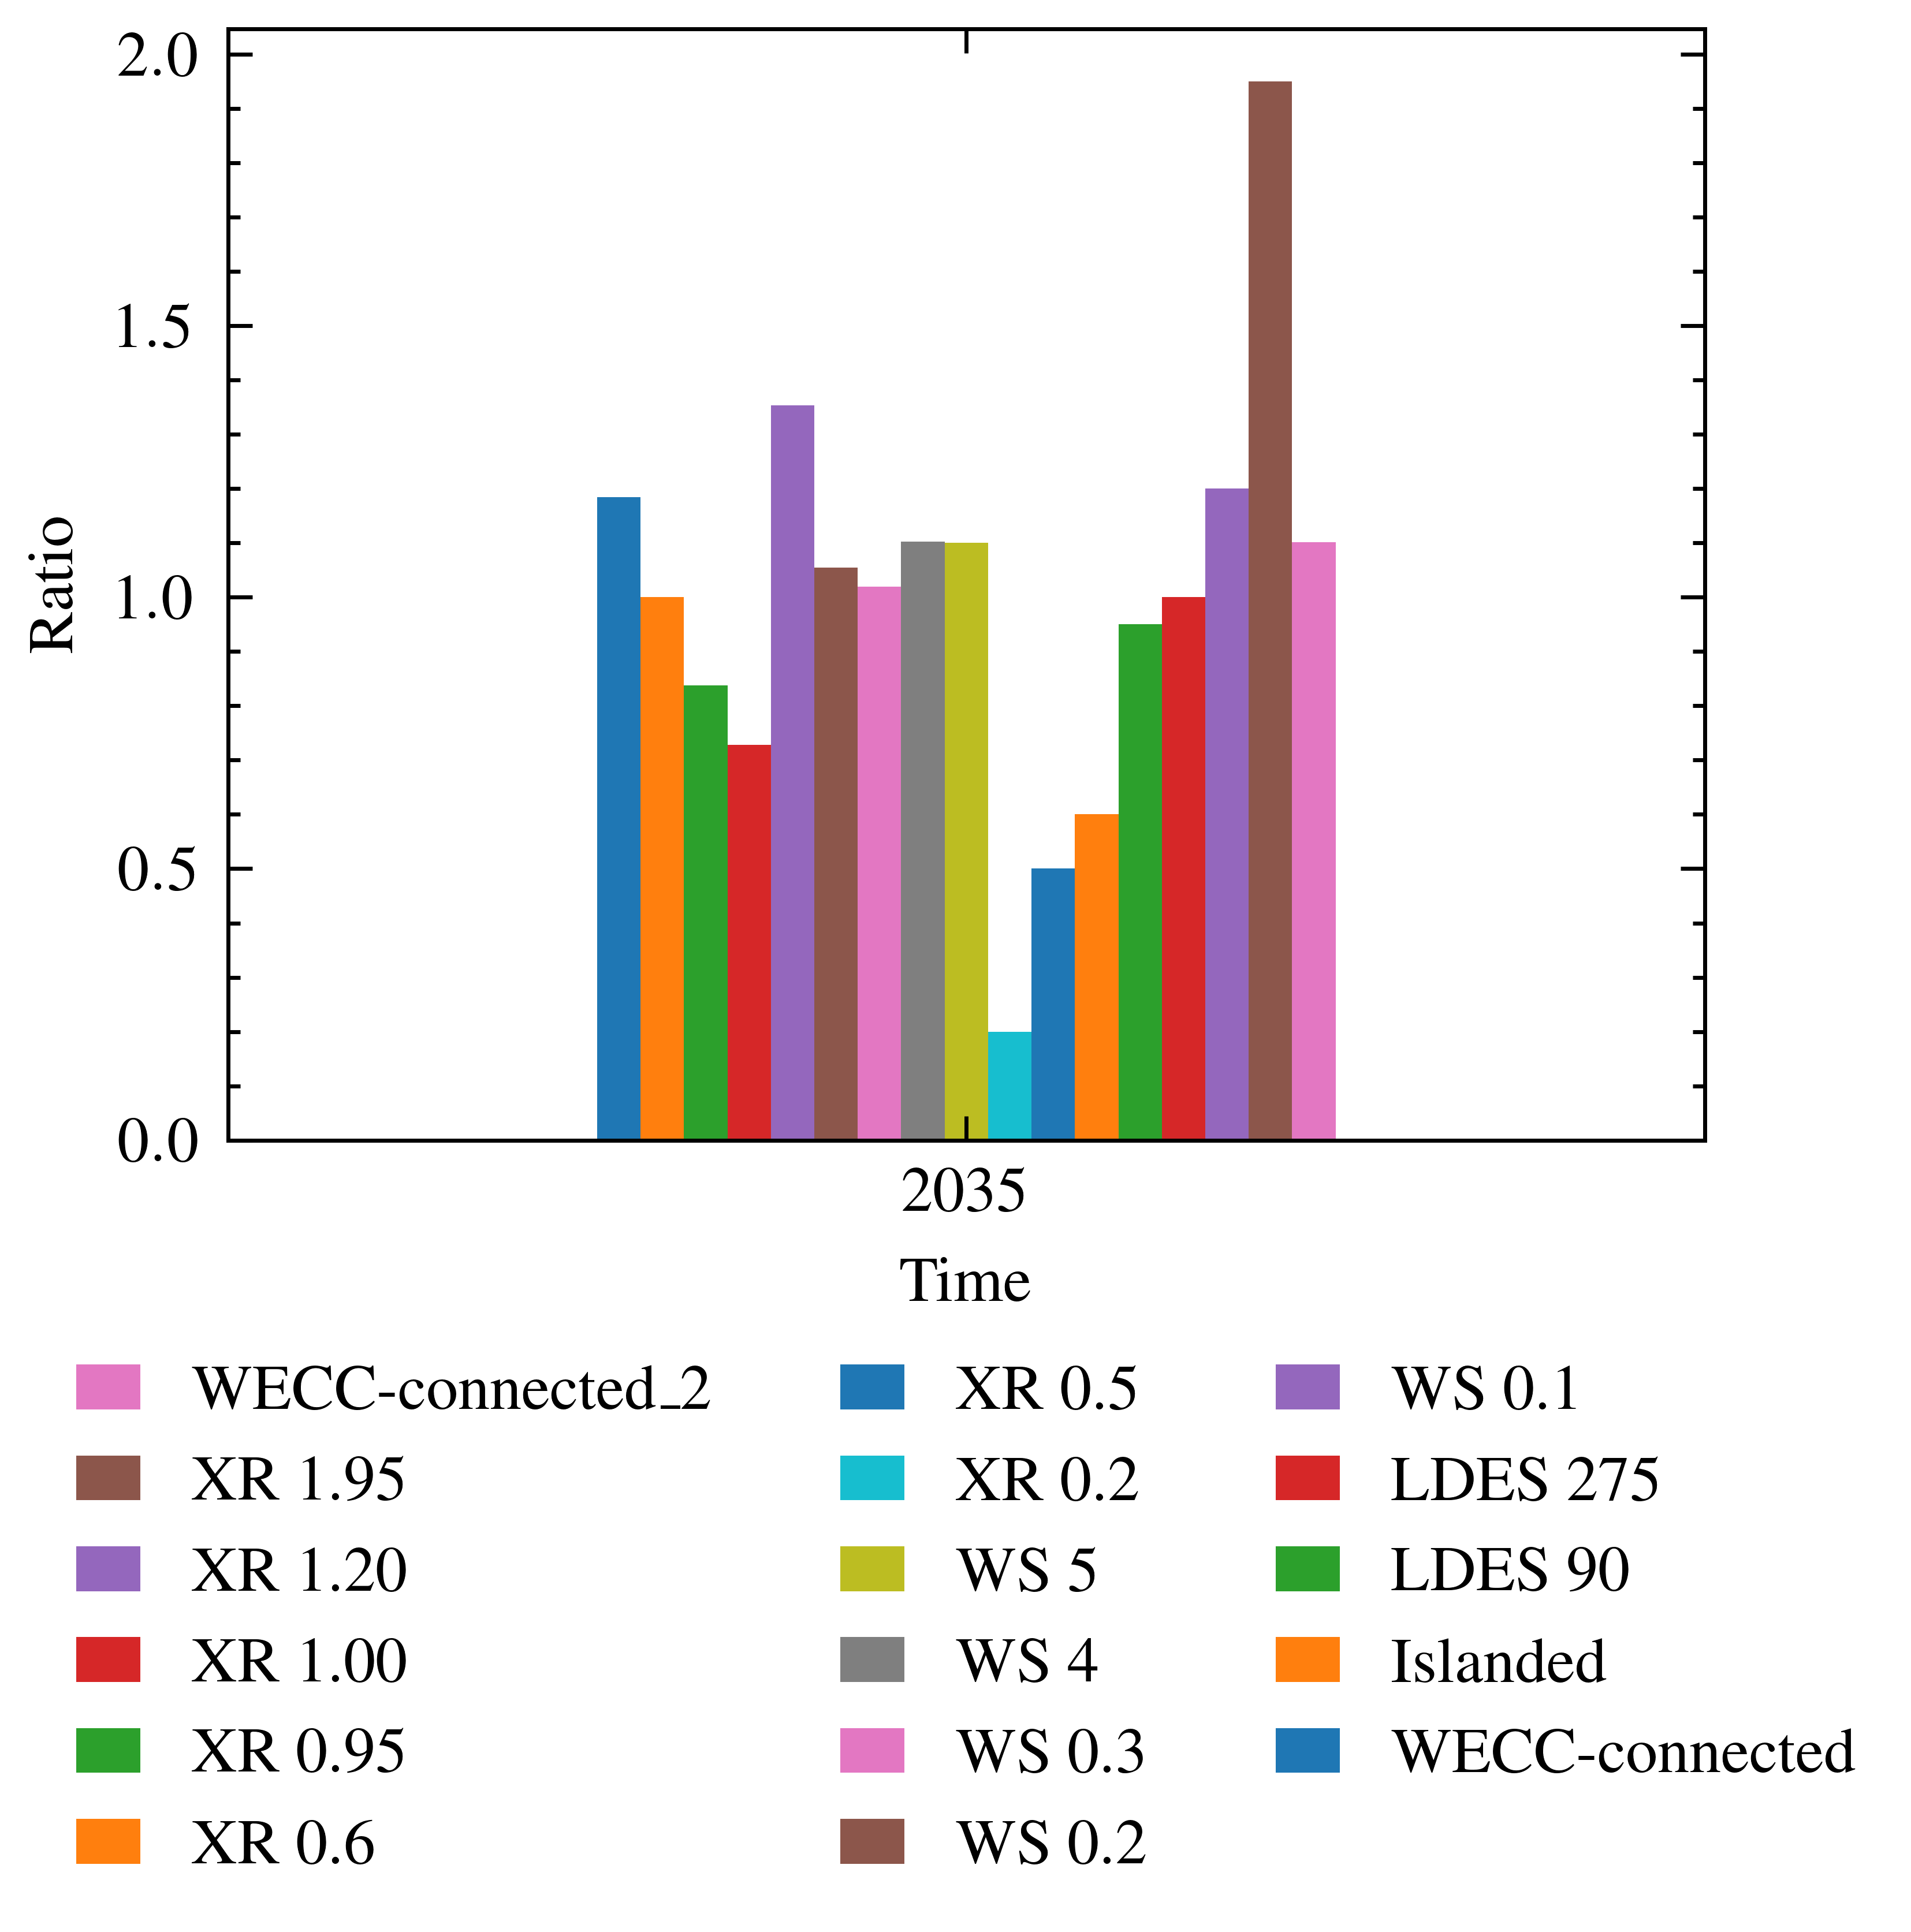

In [15]:
# Initialize figure environment
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

fig, ax = plt.subplots(dpi=1000)

# Main plot
ax = annual_zone_power_balance_by_scenario.plot(kind='bar', ax=ax, rot=0, lw=0.8, color=colors)

# Label configuration
plt.xlabel("Time")
plt.ylabel("Ratio")

# Legend configuration
handles, labels = ax.get_legend_handles_labels()
ax.legend(
    handles[::-1],
    labels[::-1],
    bbox_to_anchor=(0.5, -0.15),
    loc="upper center",
    ncol=3,
    handlelength=1,
    fancybox=True,
    edgecolor="black",
    facecolor="white",
)

#Set title

plt.savefig(folder_to_save_results+"Annually ratio (injection by widthdrawal) in PNM.png", transparent=False)

### Monthly injection and withdrawal 

In [16]:
analysis_year=[2035]
year_zone_power_balance=zone_power_balance.copy()
year_zone_power_balance=year_zone_power_balance.loc[year_zone_power_balance['ts_period'].isin(analysis_year)]

zone_power_balance_by_sc=year_zone_power_balance.pivot_table(  
    index=["scenario", "month"],
    values=['injection', 'withdrawal'],
    aggfunc=np.sum,
)
zone_power_balance_by_sc['ratio']=zone_power_balance_by_sc['injection']/zone_power_balance_by_sc['withdrawal']

zone_power_balance_by_sc=zone_power_balance_by_sc.pivot_table(  
    index="month",
    columns="scenario",
    values='ratio',
    aggfunc=np.sum,
)
#Sort the columns of the dataframe
zone_power_balance_by_sc=zone_power_balance_by_sc[order_cols]

zone_power_balance_by_sc

scenario,WECC-connected,Islanded,LDES 90,LDES 275,WS 0.1,WS 0.2,WS 0.3,WS 4,WS 5,XR 0.2,XR 0.5,XR 0.6,XR 0.95,XR 1.00,XR 1.20,XR 1.95,WECC-connected_2
month,,,,,,,,,,,,,,,,,
1,1.58,1.00,1.08,0.95,1.40,1.13,1.12,1.52,1.51,0.01,0.31,0.64,1.30,1.36,1.66,2.58,1.51
2,1.41,1.00,1.01,0.89,1.35,1.11,1.11,1.36,1.35,0.01,0.27,0.54,1.14,1.22,1.53,2.54,1.37
3,1.60,1.00,1.12,1.01,1.42,1.20,1.18,1.56,1.54,0.01,0.61,0.86,1.30,1.37,1.73,2.74,1.56
4,1.38,1.00,0.99,0.91,1.31,1.09,1.07,1.30,1.31,0.01,0.09,0.15,1.04,1.16,1.62,2.73,1.30
5,1.06,1.00,0.73,0.65,1.27,1.03,0.97,0.96,0.95,0.01,0.05,0.12,0.72,0.79,1.08,2.11,0.94
6,0.79,1.00,0.58,0.49,1.30,0.97,0.89,0.70,0.69,0.08,0.22,0.27,0.58,0.63,0.71,1.42,0.69
7,0.68,1.00,0.53,0.43,1.33,0.93,0.86,0.58,0.58,0.32,0.49,0.50,0.56,0.57,0.58,1.12,0.57
8,0.67,1.00,0.52,0.42,1.29,0.92,0.84,0.58,0.57,0.31,0.51,0.53,0.57,0.57,0.57,1.07,0.57
9,1.05,1.00,0.77,0.65,1.41,1.07,1.04,0.95,0.95,0.41,0.63,0.64,0.83,0.87,1.00,1.66,0.95


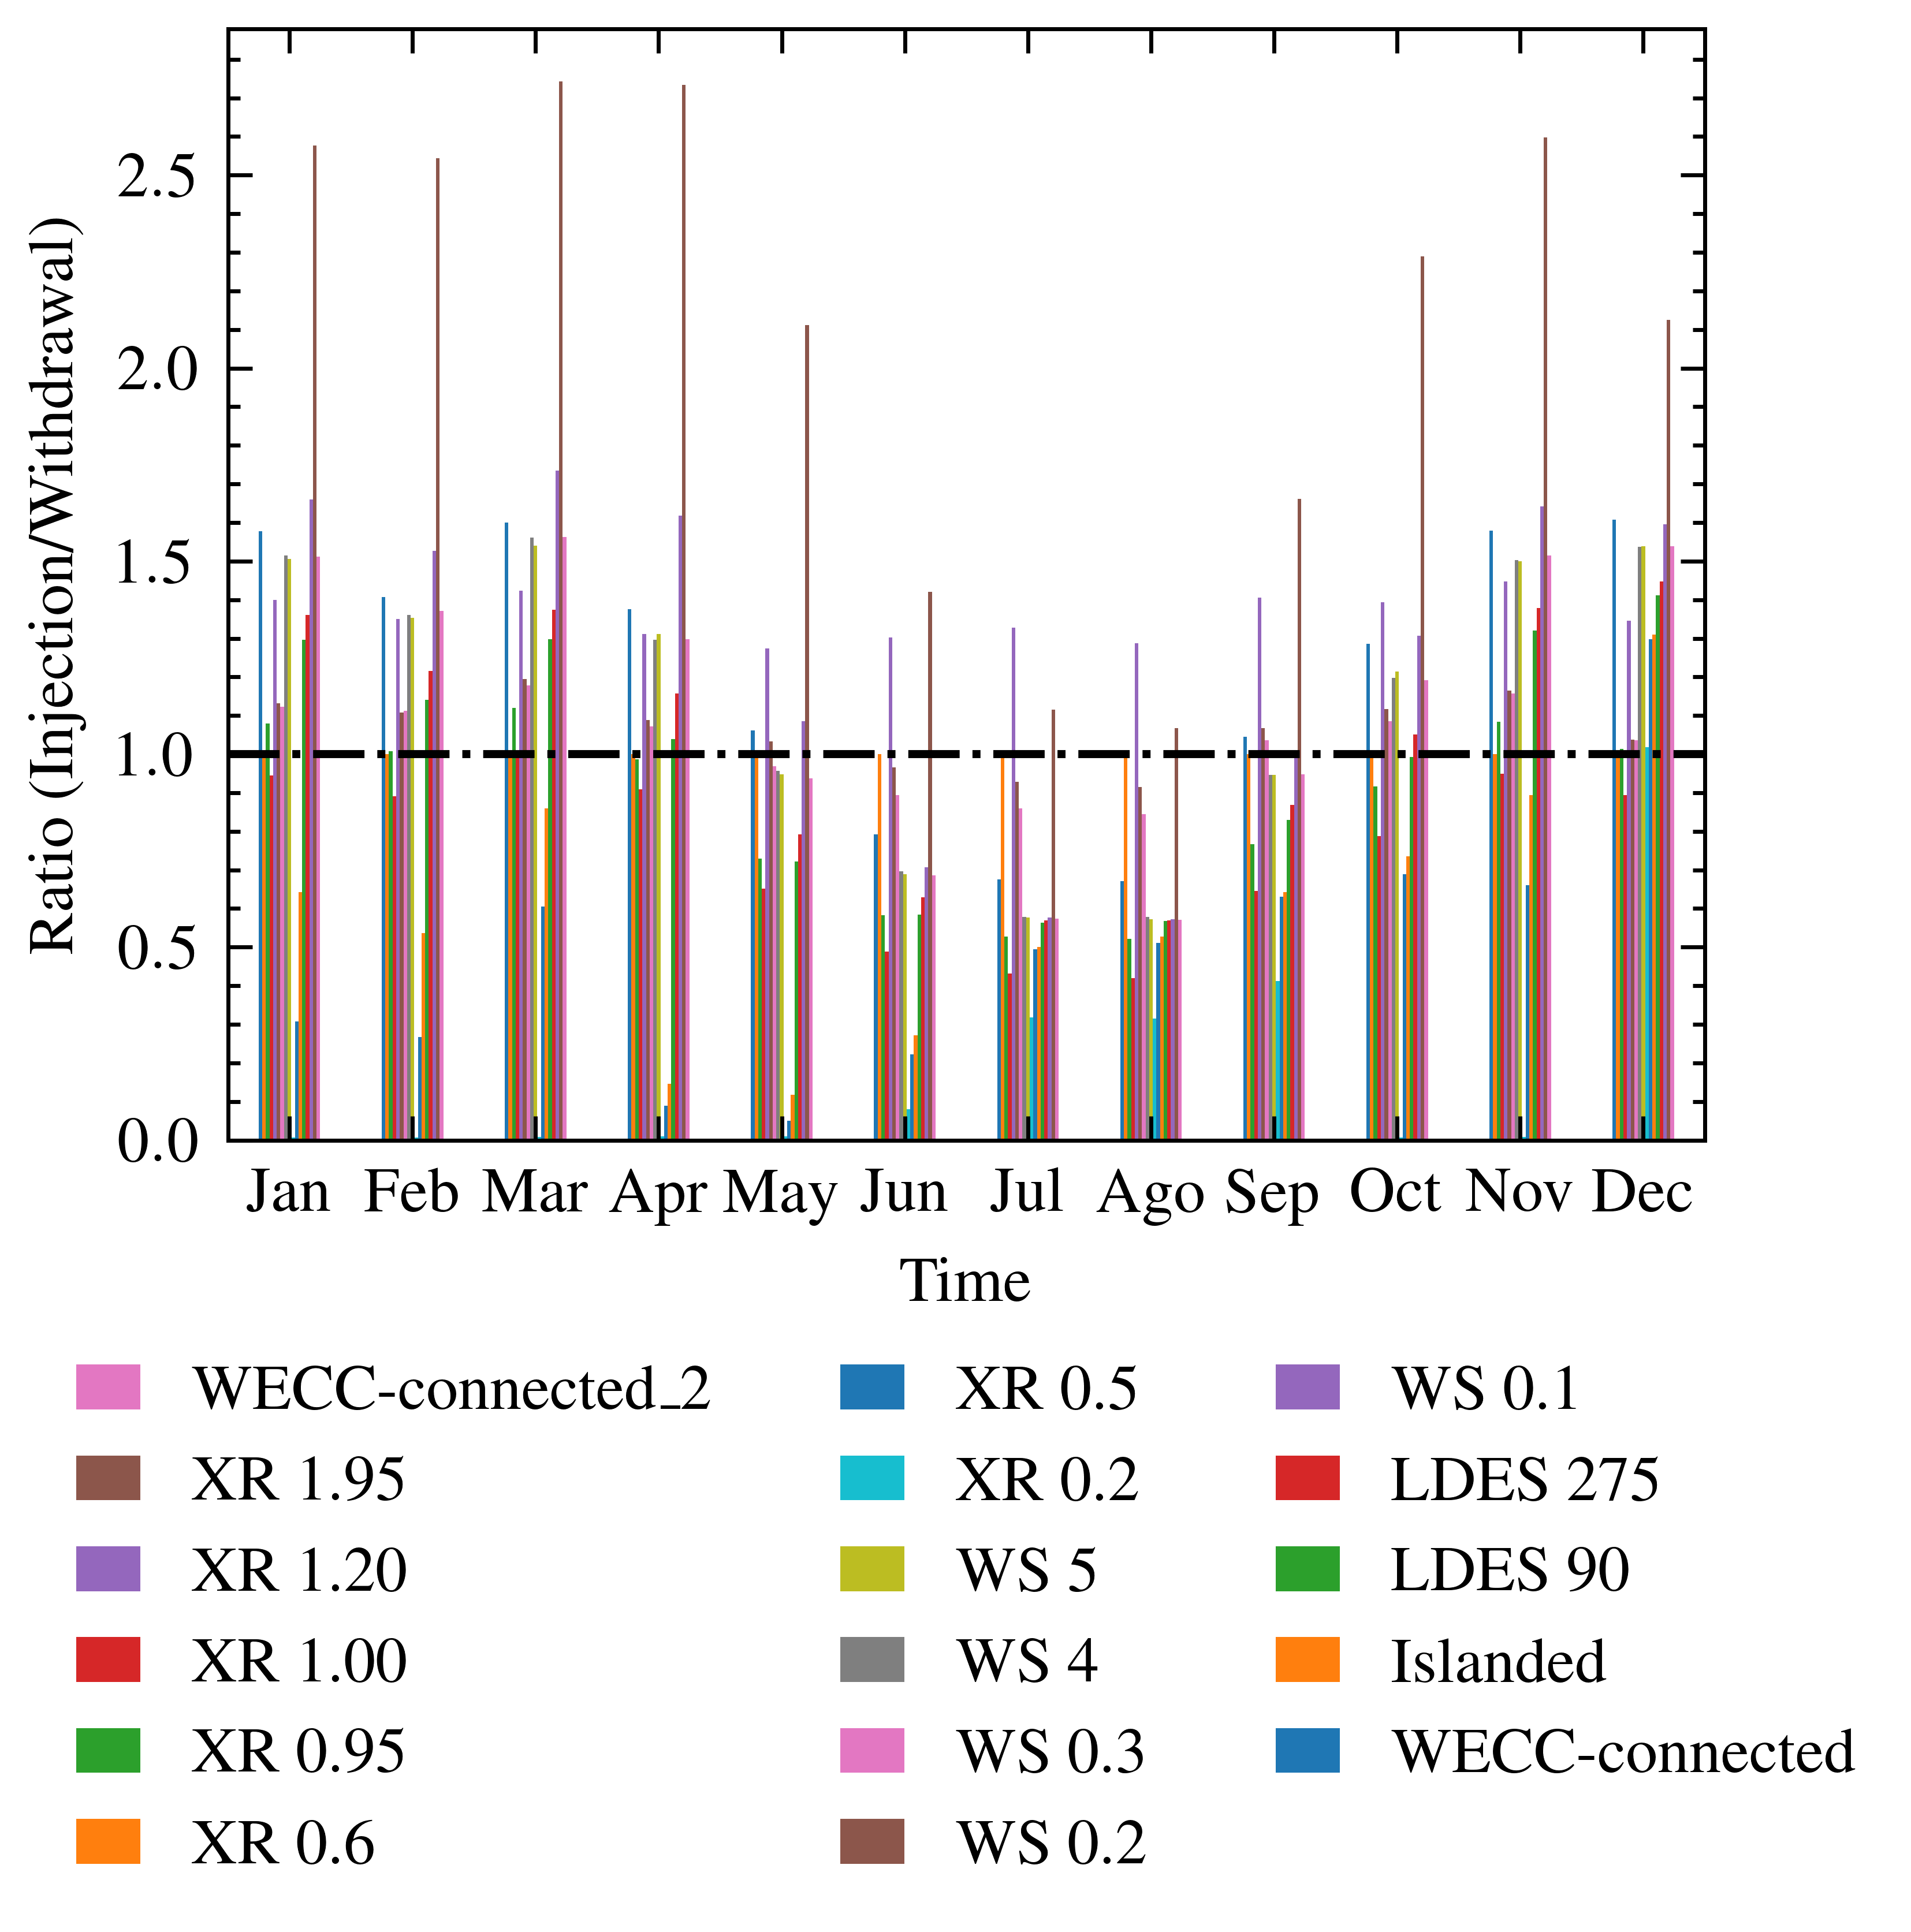

In [17]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

fig, ax = plt.subplots(dpi=1000)

# Main plot
ax = zone_power_balance_by_sc.plot(kind='bar', ax=ax, color=colors, lw=1)

ax.xaxis.set_tick_params(which='minor', top=False, bottom=False)

# Label configuration
plt.xlabel("Time")
plt.ylabel("Ratio (Injection/Withdrawal)")

dic={1 : 'Jan', 2: 'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Ago', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
ax.set_xticklabels(dic.values(), rotation=0)
plt.axhline(y=1, color='k', linestyle='dashdot')
# Legend configuration
handles, labels = ax.get_legend_handles_labels()
ax.legend(
    handles[::-1],
    labels[::-1],
    bbox_to_anchor=(0.5, -0.15),
    loc="upper center",
    ncol=3,
    handlelength=1,
    fancybox=True,
    edgecolor="black",
    facecolor="white",
)

#Set title
plt.savefig(folder_to_save_results+"Monthly ratio (injection by widthdrawal) in PNM in " + str(analysis_year)+".png", transparent=False)